In [125]:
"""Import BDPA data for all districts"""

import pandas as pd

df = pd.read_csv('businesses.csv') #contains bdpa info for all businesses

df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)



In [126]:
"""Generate Totals For every district ~ number of businesse,restuarants,liqour stores in district"""

import pandas as pd
import matplotlib.pyplot as plt
import folium
import geojson
from shapely.geometry import shape, Point

with open("City_Council_Districts_View.geojson") as f:
    gj = geojson.load(f)

district_names = []
total_num_businesses = []
total_num_restaurants = []
total_num_liquor_stores = []

for i in range(len(gj['features'])):
    district = gj['features'][i]['properties']['DISTRICT']
    district_names.append(district)
    boundaries = shape(gj['features'][i]['geometry'])
    temp_df = df[df.apply(lambda x: Point(x.longitude,x.latitude).within(boundaries), axis=1)]
    num_buinesses = len(temp_df)
    num_restuarants = len(temp_df[temp_df["NAICS_2017_6digit_code"].isin([722511])]) #Beer, Wine, and Liquor Stores - 445310 / Full Service Restuarants - 722511
    
    total_num_liquor_stores.append(len(temp_df[temp_df["NAICS_2017_6digit_code"].isin([445310])]))
    total_num_restaurants.append(num_restuarants)
    total_num_businesses.append(num_buinesses)

Total Number of Businesses Per District[309, 784, 461, 255, 546, 909, 411, 695, 568]
District Names[1, 2, 7, 8, 3, 6, 4, 9, 5]
Num restuarants per district[44, 133, 44, 24, 59, 88, 36, 131, 49]
Ratio of rests. to total busineses [0.142, 0.17, 0.095, 0.094, 0.108, 0.097, 0.088, 0.188, 0.086]


Text(0.5, 1.0, 'Ratio of Full Service Restaurants to All Businnesses Per District')

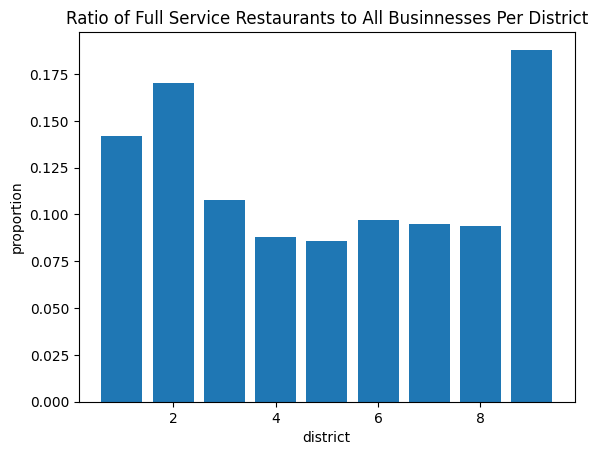

In [127]:
"""Generate number of total busineeses : total number of rests. in district"""

#
print("Total Number of Businesses Per District" + str(total_num_businesses))
print("District Names" + str(district_names))
print("Num restuarants per district" + str(total_num_restaurants))

rest_ratios = [] #ratio of resturants to businesses
for i in range(len(total_num_businesses)):
    rest_ratios.append(round(total_num_restaurants[i]/total_num_businesses[i], 3))

print("Ratio of rests. to total busineses", rest_ratios)

"""ax1 = plt.subplot(9,2,1)
ax1.bar(x=district_names,height=rest_ratios) 
ax1.set_xlabel("district")
ax1.set_ylabel("no. full service restuarants")
ax1.set_title("district number")"""

plt.bar(height=rest_ratios, x=district_names)
#ax2.bar(x=district_names,height=rest_ratios) 
plt.xlabel("district")
plt.ylabel("proportion")
plt.title("Proportion of Full Service Restaurants to All Businnesses Per District")


Text(0.5, 1.0, 'Number of Full Service Restaurants Per District')

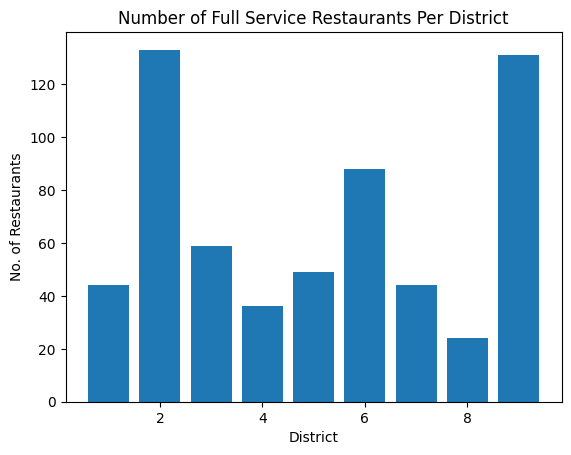

In [128]:
plt.bar(height=total_num_restaurants,x=district_names)
plt.xlabel("District")
plt.ylabel("No. of Restaurants")
plt.title("Number of Full Service Restaurants Per District")

Total Number of Businesses Per District[309, 784, 461, 255, 546, 909, 411, 695, 568]
District Names[1, 2, 7, 8, 3, 6, 4, 9, 5]
Num liquor stores per district[5, 2, 4, 3, 9, 10, 8, 7, 7]
Ratio of liquor stores to total busineses [0.016, 0.003, 0.009, 0.012, 0.016, 0.011, 0.019, 0.01, 0.012]


Text(0.5, 1.0, 'Proportion of Liquor Stores to All Businesses By District')

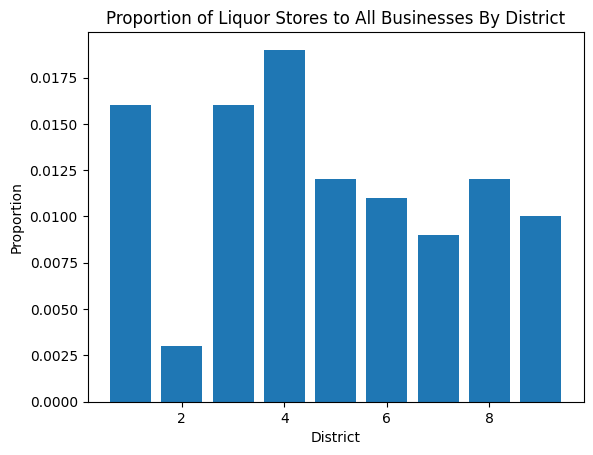

In [131]:
"""Generate number of total busineeses : total number of liq. stores in district"""

#
print("Total Number of Businesses Per District" + str(total_num_businesses))
print("District Names" + str(district_names))
print("Num liquor stores per district" + str(total_num_liquor_stores))

liq_ratios = [] #ratio of resturants to businesses
for i in range(len(total_num_businesses)):
    liq_ratios.append(round(total_num_liquor_stores[i]/total_num_businesses[i], 3))

print("Ratio of liquor stores to total busineses", liq_ratios)


plt.bar(x=district_names,height=liq_ratios)
plt.xlabel("District")
plt.ylabel("Proportion")
plt.title("Proportion of Liquor Stores to All Businesses By District")

In [83]:
"""Go through the number of full service restuarants that also have liquor licesnse"""
full_service_rests_df = df[df["NAICS_2017_6digit_code"] == 722511] #contains all full service restuarants across all districts

#adress normalizer
def normalize_address(address): #normalize adresses to the form /number/name/prefix --> ex. 122mainst
    return str(address).lower().replace(" ", "").replace("-","")


#import liquor licesnse dataset
liquor_df = pd.read_csv("liquor_license_data.csv")


#normalize all adresses in the liquor license dataset and in the exist bpda dataframe
liquor_df["address"] = liquor_df["address"].apply(lambda val : normalize_address(val))
full_service_rests_df["street_address"] = full_service_rests_df["street_address"].apply(lambda val : normalize_address(val))

#convert zip codes to string for merge
liquor_df["zip"] = liquor_df["zip"].apply(lambda val : str(val))
full_service_rests_df["zip"] = full_service_rests_df["zip"].apply(lambda val : str(val))

#merge the full service rest. list and the liquor license dataset on the normalized adresses
merge_df = pd.merge(left=liquor_df, right=full_service_rests_df, left_on=["address","zip"], right_on=["street_address","zip"])



/var/folders/k5/lftrq04906529_0xd53z6vdw0000gn/T/ipykernel_46783/3568201968.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_service_rests_df["street_address"] = full_service_rests_df["street_address"].apply(lambda val : normalize_address(val))
/var/folders/k5/lftrq04906529_0xd53z6vdw0000gn/T/ipykernel_46783/3568201968.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_service_rests_df["zip"] = full_service_rests_df["zip"].apply(lambda val : str(val))


In [88]:
#generate a per district count of restraunts that have licenses

district_names = []
total_num_rest_licenses = []

for i in range(len(gj['features'])):
    district = gj['features'][i]['properties']['DISTRICT']
    district_names.append(district)
    boundaries = shape(gj['features'][i]['geometry'])
    temp_df = merge_df[merge_df.apply(lambda x: Point(x.longitude,x.latitude).within(boundaries), axis=1)]
    
    total_num_rest_licenses.append(len(temp_df))





In [85]:
#print number of rest licesnes per district
print(district_names)
print(total_num_rest_licenses)

[1, 2, 7, 8, 3, 6, 4, 9, 5]
[19, 42, 10, 4, 8, 23, 2, 36, 12]


Text(0.5, 1.0, 'Proportion of Full Service Restaurants with an Alcohol License')

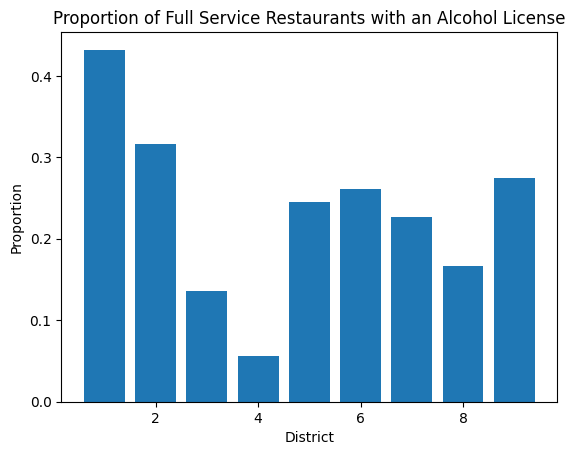

In [136]:
#generate a per district count of restraunts

district_names = []
total_num_rests = []

for i in range(len(gj['features'])):
    district = gj['features'][i]['properties']['DISTRICT']
    district_names.append(district)
    boundaries = shape(gj['features'][i]['geometry'])
    temp_df = full_service_rests_df[full_service_rests_df.apply(lambda x: Point(x.longitude,x.latitude).within(boundaries), axis=1)]

    total_num_rests.append(len(temp_df))

rest_to_license_ratios = []

for i in range(len(total_num_rest_licenses)):
    rest_to_license_ratios.append(round(total_num_rest_licenses[i]/total_num_rests[i], 3))

plt.bar(x=district_names, height=rest_to_license_ratios)
plt.xlabel("District")
plt.ylabel("Proportion")
plt.title("Proportion of Full Service Restaurants with an Alcohol License")


In [79]:
print(district_names)
print(total_num_rests)

[1, 2, 7, 8, 3, 6, 4, 9, 5]
[44, 133, 44, 24, 59, 88, 36, 131, 49]
